# MNIST: мотивация использовать нейросети

In [11]:
import tensorflow as tf
import numpy as np
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# download data
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [3]:
# show data
print(x_train.shape)
print(x_val.shape)
print(y_train[:10])
print(y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


Пример кусочки картинки (пиксели со значением от 0 до 255):


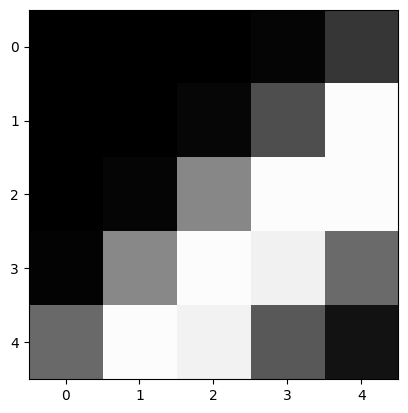

Пример картинки:


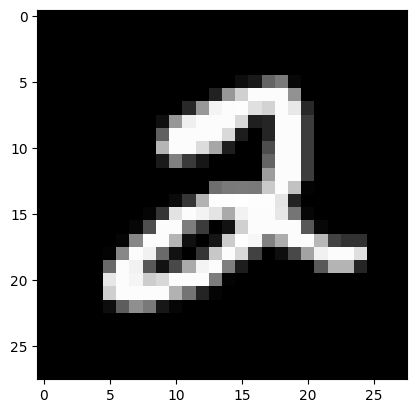

y_train [shape (60000,)] 10 примеров:
 [5 0 4 1 9 2 1 3 1 4]


In [4]:
# draw the picture
x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))
print("Пример кусочки картинки (пиксели со значением от 0 до 255):")
plt.imshow(x_train_image[15:20, 5:10], cmap="Greys")
plt.show()
print("Пример картинки:")
plt.imshow(x_train_image, cmap="Greys")
plt.show()
print("y_train [shape %s] 10 примеров:\n" % (str(y_train.shape)), y_train[:10])

# Линейная модель
Линейная модель не умеет работать с двумерным входом, поэтому предлгается превратить картинку 28х28 в вектор длины
28*28=784, выписав её построчно!
Обучается градиентным спуском:

In [5]:
x_train_flat = x_train.reshape(-1, 28*28).astype(float)
print(x_train_flat.shape)
x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_val_flat.shape)

(60000, 784)
(10000, 784)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_val_flat = scaler.transform(x_val_flat)

In [7]:
# кусочек фичей
x_train_flat[0, ::20]

array([ 0.        ,  0.        , -0.03059266, -0.00852241, -0.01408835,
       -0.2625969 , -0.16124756,  0.        ,  1.71565971,  0.74933951,
       -0.11300485, -0.19700703,  1.12192712,  0.27021375, -0.00577281,
       -0.70132425,  1.64634567, -0.1273685 , -0.15382451, -0.19833719,
       -0.70732309, -0.00477028, -0.60978718, -0.9194134 , -0.17786005,
       -0.16833376,  0.65022085, -0.63188648,  0.        , -0.48806277,
        1.17394853, -0.14774138, -0.07003976, -0.61257571,  3.52099754,
        0.        , -0.09396514, -0.1826269 , -0.00579016,  0.        ])

In [12]:
%%time
# обучаем линейную модель, обучается градиентными методами оптимизации
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class="multinomial", solver="lbfgs") #, max_iter=1000)
clf.fit(x_train_flat, y_train)

CPU times: user 3min 15s, sys: 779 ms, total: 3min 16s
Wall time: 28.4 s


LogisticRegression(multi_class='multinomial')

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, clf.predict(x_val_flat))

0.9246

# Градиентный бустинг

In [15]:
# качество так себе, а если картинка будет 300х300 это будет работать вечность
accuracy_score(y_val, clf.predict(x_val_flat))

0.8907

# Нейросети
Соберем сложную функуцию как комбинацию простых линейных моделей (например логистических регрессий):

In [16]:
%%time
from sklearn.neural_network import MLPClassifier # многослойный персептрон (просто много полносвязных слоёв)
clf = MLPClassifier(max_iter=10, random_state=0)
clf.fit(x_train_flat, y_train)

CPU times: user 2min 58s, sys: 1.92 s, total: 3min
Wall time: 26 s


MLPClassifier(max_iter=10, random_state=0)

In [17]:
# качество выше линейной модели, скорость выше
accuracy_score(y_val, clf.predict(x_val_flat))

0.9742